In [1]:
library("foreign")
rawdata=read.arff("./caesarian.csv.arff")
colnames(rawdata) = c("Age","DN","DT","BP","HP","CS")
str(rawdata)

'data.frame':	80 obs. of  6 variables:
 $ Age: Factor w/ 22 levels "17","18","19",..: 6 10 10 12 6 10 11 16 12 11 ...
 $ DN : Factor w/ 4 levels "1","2","3","4": 1 2 2 1 2 1 2 3 2 1 ...
 $ DT : Factor w/ 3 levels "0","1","2": 1 1 2 1 1 2 1 1 1 2 ...
 $ BP : Factor w/ 3 levels "0","1","2": 3 2 2 3 2 1 2 2 2 2 ...
 $ HP : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ CS : Factor w/ 2 levels "0","1": 1 2 1 1 2 1 1 2 1 2 ...


In [2]:
## check missing value
norg=length(rawdata[,1])
## remove rows containing missing values  
rawdata=na.omit(rawdata)
morg=length(rawdata[,1])
if( norg == morg ){ print("No rows containging missing value")}
if( norg != morg ){ print("Number of missing value="); print(norg-morg)}

[1] "No rows containging missing value"


corrplot 0.84 loaded


'data.frame':	80 obs. of  6 variables:
 $ Age: Factor w/ 22 levels "17","18","19",..: 6 10 10 12 6 10 11 16 12 11 ...
 $ DN : Factor w/ 4 levels "1","2","3","4": 1 2 2 1 2 1 2 3 2 1 ...
 $ DT : Factor w/ 3 levels "0","1","2": 1 1 2 1 1 2 1 1 1 2 ...
 $ BP : Factor w/ 3 levels "0","1","2": 3 2 2 3 2 1 2 2 2 2 ...
 $ HP : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ CS : Factor w/ 2 levels "0","1": 1 2 1 1 2 1 1 2 1 2 ...
'data.frame':	80 obs. of  6 variables:
 $ Age: num  6 10 10 12 6 10 11 16 12 11 ...
 $ DN : num  1 2 2 1 2 1 2 3 2 1 ...
 $ DT : num  1 1 2 1 1 2 1 1 1 2 ...
 $ BP : num  3 2 2 3 2 1 2 2 2 2 ...
 $ HP : num  1 1 1 1 1 1 1 1 1 1 ...
 $ CS : Factor w/ 2 levels "0","1": 1 2 1 1 2 1 1 2 1 2 ...


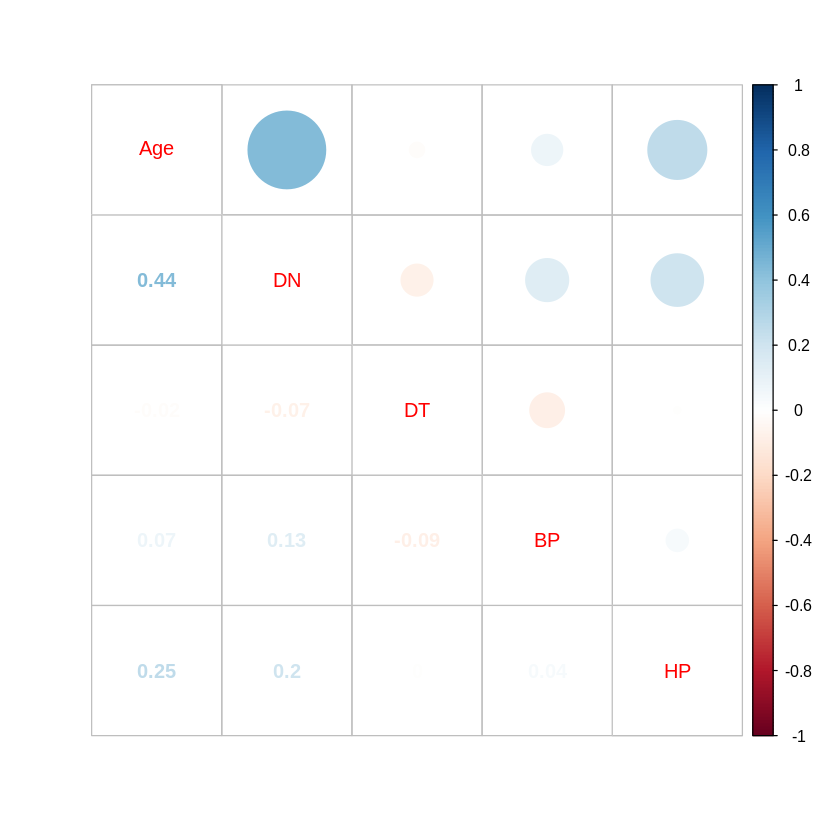

In [3]:
## check collinearity btw features
library(corrplot)
str(rawdata)
rawdata.num=rawdata
for ( i in 1:5)  { rawdata.num[,i] = as.numeric(rawdata[,i]) }
str(rawdata.num)

rawdata.cor = cor(rawdata.num[,1:5])
corrplot.mixed(rawdata.cor)

In [5]:
##sample from category data

## dividing orginal data by ratio for tran, test

#fix random seed
set.seed(123)

# make index vector(row number) for two type(x=2 : train, test) of samples 
# with probability weight : train:test = 7:3  
# in number of sample=nrow(rawdata3)=80 )
# replace : If TRUE, same data from orginal can be repeat in new sample
ind = sample(2, nrow(rawdata), replace=TRUE, prob=c(0.7,0.3))

## log reg from numeric data
traindata.num = rawdata.num[ind==1,] 
str(traindata.num) ## 80datas * 70% = 56datas
testdata.num = rawdata.num[ind==2,] 
str(testdata.num)



'data.frame':	56 obs. of  6 variables:
 $ Age: num  6 10 10 11 12 11 17 7 4 13 ...
 $ DN : num  1 2 1 2 2 1 1 1 1 1 ...
 $ DT : num  1 2 2 1 1 2 2 2 1 3 ...
 $ BP : num  3 2 1 2 2 2 1 2 2 1 ...
 $ HP : num  1 1 1 1 1 1 1 1 2 2 ...
 $ CS : Factor w/ 2 levels "0","1": 1 1 1 1 1 2 2 1 1 2 ...
'data.frame':	24 obs. of  6 variables:
 $ Age: num  10 12 6 16 19 9 8 10 11 2 ...
 $ DN : num  2 1 2 3 1 1 1 1 1 1 ...
 $ DT : num  1 1 1 1 1 3 3 2 1 1 ...
 $ BP : num  2 3 2 2 2 1 1 2 1 2 ...
 $ HP : num  1 1 1 1 1 1 2 1 2 1 ...
 $ CS : Factor w/ 2 levels "0","1": 2 1 2 2 1 1 2 1 2 1 ...


In [6]:
## logistic reg. for category data (numeric type)
full.fit_num = glm(CS~., family=binomial, data=traindata.num)
summary(full.fit_num)


Call:
glm(formula = CS ~ ., family = binomial, data = traindata.num)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9359  -1.0293   0.5149   0.8963   1.5201  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept) -2.78921    1.76248  -1.583  0.11353   
Age          0.05993    0.07465   0.803  0.42208   
DN          -0.13158    0.44714  -0.294  0.76856   
DT          -0.14475    0.38001  -0.381  0.70327   
BP           0.24278    0.45556   0.533  0.59409   
HP           1.79571    0.67783   2.649  0.00807 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 75.837  on 55  degrees of freedom
Residual deviance: 65.160  on 50  degrees of freedom
AIC: 77.16

Number of Fisher Scoring iterations: 4


In [7]:
#confidence interval for train
confint(full.fit_num)
#odd's ratio
exp(coef(full.fit_num))

Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),-6.52697337,0.4877489
Age,-0.08732483,0.2112889
DN,-1.03231225,0.7578197
DT,-0.90278716,0.6074640
BP,-0.65111496,1.1662917
HP,0.53867485,3.2457265


(Intercept)         Age          DN          DT          BP          HP 
  0.0614700   1.0617647   0.8767134   0.8652415   1.2747866   6.0237491

In [9]:
# variance inflation factor for train
library(car)
vif(full.fit_num)

Age       DN       DT       BP       HP 
1.330151 1.349681 1.046439 1.080094 1.055763

In [10]:
#prediction in the range 0~1 (rseponse) 
traindata.num$prob = predict(full.fit_num, type="response")
traindata.num$predict = rep(0, length(traindata.num$prob)) # make empty vector as 0 (False)
traindata.num$predict[traindata.num$prob>0.5] = 1 #fill vector if true (prob>0.5)
confm=table(traindata.num$predict, traindata.num$CS)
confm

   
     0  1
  0 17 12
  1  6 21

In [11]:
#confusion matrix for train sample
library(caret)
confm=confusionMatrix(as.factor(traindata.num$predict), as.factor(traindata.num$CS), positive="1")
confm
str(confm)
# Sensitivity = Precision
Precision=confm$byClass["Sensitivity"]
print(Precision)
# Pos Pred Value = Recall
Recall=confm$byClass["Pos Pred Value"]
print(Recall)
# Accuracy
Accuracy = confm$overall["Accuracy"]
print(Accuracy)

Loading required package: lattice
Loading required package: ggplot2


Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 17 12
         1  6 21
                                          
               Accuracy : 0.6786          
                 95% CI : (0.5404, 0.7971)
    No Information Rate : 0.5893          
    P-Value [Acc > NIR] : 0.1098          
                                          
                  Kappa : 0.3612          
 Mcnemar's Test P-Value : 0.2386          
                                          
            Sensitivity : 0.6364          
            Specificity : 0.7391          
         Pos Pred Value : 0.7778          
         Neg Pred Value : 0.5862          
             Prevalence : 0.5893          
         Detection Rate : 0.3750          
   Detection Prevalence : 0.4821          
      Balanced Accuracy : 0.6877          
                                          
       'Positive' Class : 1               
                                          

List of 6
 $ positive: chr "1"
 $ table   : 'table' int [1:2, 1:2] 17 6 12 21
  ..- attr(*, "dimnames")=List of 2
  .. ..$ Prediction: chr [1:2] "0" "1"
  .. ..$ Reference : chr [1:2] "0" "1"
 $ overall : Named num [1:7] 0.679 0.361 0.54 0.797 0.589 ...
  ..- attr(*, "names")= chr [1:7] "Accuracy" "Kappa" "AccuracyLower" "AccuracyUpper" ...
 $ byClass : Named num [1:11] 0.636 0.739 0.778 0.586 0.778 ...
  ..- attr(*, "names")= chr [1:11] "Sensitivity" "Specificity" "Pos Pred Value" "Neg Pred Value" ...
 $ mode    : chr "sens_spec"
 $ dots    : list()
 - attr(*, "class")= chr "confusionMatrix"
Sensitivity 
  0.6363636 
Pos Pred Value 
     0.7777778 
 Accuracy 
0.6785714 


In [12]:
# test sample
testdata.num$prob = predict(full.fit_num, newdata=testdata.num, type="response")
testdata.num$predict = rep(0, length(testdata.num$prob))
testdata.num$predict[testdata.num$prob>0.5] = 1
table(testdata.num$predict, testdata.num$CS)
mean(testdata.num$predict == testdata.num$CS)

   
    0 1
  0 6 7
  1 5 6

[1] 0.5

In [13]:
#confusion matrix for test sample
library(caret)
confm=confusionMatrix(as.factor(testdata.num$predict), as.factor(testdata.num$CS), positive="1")
# Sensitivity = Precision
# Pos Pred Value = Recall
# Accuracy
confm
str(confm)
# Sensitivity = Precision
Precision=confm$byClass["Sensitivity"]
print(Precision)
# Pos Pred Value = Recall
Recall=confm$byClass["Pos Pred Value"]
print(Recall)
# Accuracy
Accuracy = confm$overall["Accuracy"]
print(Accuracy)

Confusion Matrix and Statistics

          Reference
Prediction 0 1
         0 6 7
         1 5 6
                                          
               Accuracy : 0.5             
                 95% CI : (0.2912, 0.7088)
    No Information Rate : 0.5417          
    P-Value [Acc > NIR] : 0.7313          
                                          
                  Kappa : 0.0069          
 Mcnemar's Test P-Value : 0.7728          
                                          
            Sensitivity : 0.4615          
            Specificity : 0.5455          
         Pos Pred Value : 0.5455          
         Neg Pred Value : 0.4615          
             Prevalence : 0.5417          
         Detection Rate : 0.2500          
   Detection Prevalence : 0.4583          
      Balanced Accuracy : 0.5035          
                                          
       'Positive' Class : 1               
                                          

List of 6
 $ positive: chr "1"
 $ table   : 'table' int [1:2, 1:2] 6 5 7 6
  ..- attr(*, "dimnames")=List of 2
  .. ..$ Prediction: chr [1:2] "0" "1"
  .. ..$ Reference : chr [1:2] "0" "1"
 $ overall : Named num [1:7] 0.5 0.0069 0.2912 0.7088 0.5417 ...
  ..- attr(*, "names")= chr [1:7] "Accuracy" "Kappa" "AccuracyLower" "AccuracyUpper" ...
 $ byClass : Named num [1:11] 0.462 0.545 0.545 0.462 0.545 ...
  ..- attr(*, "names")= chr [1:11] "Sensitivity" "Specificity" "Pos Pred Value" "Neg Pred Value" ...
 $ mode    : chr "sens_spec"
 $ dots    : list()
 - attr(*, "class")= chr "confusionMatrix"
Sensitivity 
  0.4615385 
Pos Pred Value 
     0.5454545 
Accuracy 
     0.5 


In [14]:
#best subset reg.
library(bestglm)
cvdata = traindata.num[,-7:-8]
orgcolname=colnames(rawdata)
orgcolname[6]="y"
orgcolname
colnames(cvdata)=orgcolname
head(cvdata)
#cvdata$y= as.numeric(traindata$CS)
str(cvdata)

Loading required package: leaps


[1] "Age" "DN"  "DT"  "BP"  "HP"  "y"

,Age,DN,DT,BP,HP,y
1,6,1,1,3,1,0
3,10,2,2,2,1,0
6,10,1,2,1,1,0
7,11,2,1,2,1,0
9,12,2,1,2,1,0
10,11,1,2,2,1,1


'data.frame':	56 obs. of  6 variables:
 $ Age: num  6 10 10 11 12 11 17 7 4 13 ...
 $ DN : num  1 2 1 2 2 1 1 1 1 1 ...
 $ DT : num  1 2 2 1 1 2 2 2 1 3 ...
 $ BP : num  3 2 1 2 2 2 1 2 2 1 ...
 $ HP : num  1 1 1 1 1 1 1 1 2 2 ...
 $ y  : Factor w/ 2 levels "0","1": 1 1 1 1 1 2 2 1 1 2 ...


In [17]:
#k-fold cross validation
cvdata.bestset=bestglm(Xy=cvdata, IC="CV", CVArgs=list(Method="HTF", K=3, REP=1), family=binomial)
summary(cvdata.best)

Morgan-Tatar search since family is non-gaussian.
Warning message in mean.default(y[!iTest]):
“argument is not numeric or logical: returning NA”Warning message in Ops.factor(y[iTest], yHat):
“‘-’ not meaningful for factors”Warning message in Ops.factor(y[iTest], yHat):
“‘-’ not meaningful for factors”Warning message in mean.default(y[!iTest]):
“argument is not numeric or logical: returning NA”Warning message in Ops.factor(y[iTest], yHat):
“‘-’ not meaningful for factors”Warning message in Ops.factor(y[iTest], yHat):
“‘-’ not meaningful for factors”Warning message in mean.default(y[!iTest]):
“argument is not numeric or logical: returning NA”Warning message in Ops.factor(y[iTest], yHat):
“‘-’ not meaningful for factors”Warning message in Ops.factor(y[iTest], yHat):
“‘-’ not meaningful for factors”Warning message in Ops.factor(y[iTest], yHat):
“‘-’ not meaningful for factors”Warning message in Ops.factor(y[iTest], yHat):
“‘-’ not meaningful for factors”Warning message in Ops.factor(y[iTes

ERROR: Error in `[.data.frame`(Xy, , c(bestset[-1], FALSE), drop = FALSE): undefined columns selected


In [16]:
#BIC
cvdata.bestset=bestglm(Xy=cvdata, IC="BIC", family=binomial)
cvdata.bestset

Morgan-Tatar search since family is non-gaussian.


BIC
BICq equivalent for q in (0.0581156714516717, 0.852591422895177)
Best Model:
             Estimate Std. Error   z value    Pr(>|z|)
(Intercept) -2.168908  0.8937965 -2.426624 0.015240046
HP           1.863526  0.6532164  2.852847 0.004332954

In [19]:
## logistic reg. again using best feature

full.fit_best = glm(CS~HP, family=binomial, data=traindata.num)
summary(full.fit_best)


Call:
glm(formula = CS ~ HP, family = binomial, data = traindata.num)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8704  -1.0508   0.6181   0.7910   1.3095  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  -2.1689     0.8938  -2.427  0.01524 * 
HP            1.8635     0.6532   2.853  0.00433 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 75.837  on 55  degrees of freedom
Residual deviance: 66.241  on 54  degrees of freedom
AIC: 70.241

Number of Fisher Scoring iterations: 4


In [20]:
#confidence interval
confint(full.fit_best)
#odd's ratio
exp(coef(full.fit_best))

Waiting for profiling to be done...


,2.5 %,97.5 %
(Intercept),-4.0017413,-0.4644816
HP,0.6565598,3.2646848


(Intercept)          HP 
  0.1143024   6.4464286

In [21]:
# variance inflation factor
library(car)
vif(full.fit_best)

ERROR: Error in vif.default(full.fit_best): model contains fewer than 2 terms


In [26]:
#prediction in the range 0~1 (rseponse)
traindata.num$prob = predict(full.fit_best, type="response")
traindata.num$predict = rep(0, length(traindata.num$prob)) # make empty vector as 0 (False)
traindata.num$predict[traindata.num$prob>0.5] = 1 #fill vector if true (prob>0.5)
confm=table(traindata.num$predict, traindata.num$CS)
confm

   
     0  1
  0 19 14
  1  4 19

In [27]:
#confusion matrix for train sample
library(caret)
confm=confusionMatrix(as.factor(traindata.num$predict), as.factor(traindata.num$CS), positive="1")
confm
str(confm)
# Sensitivity = Precision
Precision=confm$byClass["Sensitivity"]
print(Precision)
# Pos Pred Value = Recall
Recall=confm$byClass["Pos Pred Value"]
print(Recall)
# Accuracy
Accuracy = confm$overall["Accuracy"]
print(Accuracy)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 19 14
         1  4 19
                                          
               Accuracy : 0.6786          
                 95% CI : (0.5404, 0.7971)
    No Information Rate : 0.5893          
    P-Value [Acc > NIR] : 0.10983         
                                          
                  Kappa : 0.377           
 Mcnemar's Test P-Value : 0.03389         
                                          
            Sensitivity : 0.5758          
            Specificity : 0.8261          
         Pos Pred Value : 0.8261          
         Neg Pred Value : 0.5758          
             Prevalence : 0.5893          
         Detection Rate : 0.3393          
   Detection Prevalence : 0.4107          
      Balanced Accuracy : 0.7009          
                                          
       'Positive' Class : 1               
                                          

List of 6
 $ positive: chr "1"
 $ table   : 'table' int [1:2, 1:2] 19 4 14 19
  ..- attr(*, "dimnames")=List of 2
  .. ..$ Prediction: chr [1:2] "0" "1"
  .. ..$ Reference : chr [1:2] "0" "1"
 $ overall : Named num [1:7] 0.679 0.377 0.54 0.797 0.589 ...
  ..- attr(*, "names")= chr [1:7] "Accuracy" "Kappa" "AccuracyLower" "AccuracyUpper" ...
 $ byClass : Named num [1:11] 0.576 0.826 0.826 0.576 0.826 ...
  ..- attr(*, "names")= chr [1:11] "Sensitivity" "Specificity" "Pos Pred Value" "Neg Pred Value" ...
 $ mode    : chr "sens_spec"
 $ dots    : list()
 - attr(*, "class")= chr "confusionMatrix"
Sensitivity 
  0.5757576 
Pos Pred Value 
      0.826087 
 Accuracy 
0.6785714 


In [29]:
# test sample
testdata.num$prob = predict(full.fit_best, newdata=testdata.num, type="response")
testdata.num$predict = rep(0, length(testdata.num$prob))
testdata.num$predict[testdata.num$prob>0.5] = 1
table(testdata.num$predict, testdata.num$CS)
mean(testdata.num$predict == testdata.num$CS)

   
    0 1
  0 9 8
  1 2 5

[1] 0.5833333

In [30]:
#confusion matrix for test sample
library(caret)
confm=confusionMatrix(as.factor(testdata.num$predict), as.factor(testdata.num$CS), positive="1")
# Sensitivity = Precision
# Pos Pred Value = Recall
# Accuracy
confm
str(confm)
# Sensitivity = Precision
Precision=confm$byClass["Sensitivity"]
print(Precision)
# Pos Pred Value = Recall
Recall=confm$byClass["Pos Pred Value"]
print(Recall)
# Accuracy
Accuracy = confm$overall["Accuracy"]
print(Accuracy)

Confusion Matrix and Statistics

          Reference
Prediction 0 1
         0 9 8
         1 2 5
                                          
               Accuracy : 0.5833          
                 95% CI : (0.3664, 0.7789)
    No Information Rate : 0.5417          
    P-Value [Acc > NIR] : 0.4213          
                                          
                  Kappa : 0.1946          
 Mcnemar's Test P-Value : 0.1138          
                                          
            Sensitivity : 0.3846          
            Specificity : 0.8182          
         Pos Pred Value : 0.7143          
         Neg Pred Value : 0.5294          
             Prevalence : 0.5417          
         Detection Rate : 0.2083          
   Detection Prevalence : 0.2917          
      Balanced Accuracy : 0.6014          
                                          
       'Positive' Class : 1               
                                          

List of 6
 $ positive: chr "1"
 $ table   : 'table' int [1:2, 1:2] 9 2 8 5
  ..- attr(*, "dimnames")=List of 2
  .. ..$ Prediction: chr [1:2] "0" "1"
  .. ..$ Reference : chr [1:2] "0" "1"
 $ overall : Named num [1:7] 0.583 0.195 0.366 0.779 0.542 ...
  ..- attr(*, "names")= chr [1:7] "Accuracy" "Kappa" "AccuracyLower" "AccuracyUpper" ...
 $ byClass : Named num [1:11] 0.385 0.818 0.714 0.529 0.714 ...
  ..- attr(*, "names")= chr [1:11] "Sensitivity" "Specificity" "Pos Pred Value" "Neg Pred Value" ...
 $ mode    : chr "sens_spec"
 $ dots    : list()
 - attr(*, "class")= chr "confusionMatrix"
Sensitivity 
  0.3846154 
Pos Pred Value 
     0.7142857 
 Accuracy 
0.5833333 


In [74]:
#Binarization
#from train data
traindata.bin = traindata.num[,-7:-8]
orgname=colnames(traindata.bin)
orgname[6] = "y"
colnames(traindata.bin) = orgname
head(traindata.bin)


## change columns with 3 level to 2 level 
#attribute 'Delivery number' { 1,2,3,4 } 
# -> DN==1( new 0) or others( new 1)
print("DN")
table(traindata.bin$DN)
DN = ifelse(traindata.bin$DN ==4  , 1, 0 ) 
#traindata.bin$DN = as.factor(DN)
traindata.bin$DN = DN
table(traindata.bin$DN)

#attribute 'Delivery time' { 0,1,2 } -> {0 = timely , 1 = premature , 2 = latecomer}
# -> DT==0(new 0) or others( new 1)
print("DT")
table(traindata.bin$DT)
DT = ifelse(traindata.bin$DT ==1  , 0, 1 ) 
#traindata.bin$DT = as.factor(DT)
traindata.bin$DT=DT
table(traindata.bin$DT)

#attribute 'Blood of Pressure' { 2,1,0 } -> {0 = low , 1 = normal , 2 = high }
# -> DT=0,1 ( new 0) or others ( new 1)
print("BP")
table(traindata.bin$BP)
traindata.bin$BP
BP = ifelse(traindata.bin$BP == 2  , 1, 0 ) 
#traindata.bin$BP = as.factor(BP)
traindata.bin$BP = BP
table(traindata.bin$BP)

str(traindata.bin)


#HP -> no change
print("HP")
table(traindata.bin$HP)


,Age,DN,DT,BP,HP,y
1,6,1,1,3,1,0
3,10,2,2,2,1,0
6,10,1,2,1,1,0
7,11,2,1,2,1,0
9,12,2,1,2,1,0
10,11,1,2,2,1,1


[1] "DN"



 1  2  3  4 
26 21  7  2 


 0  1 
54  2 

[1] "DT"



 1  2  3 
28 15 13 


 0  1 
28 28 

[1] "BP"



 1  2  3 
12 28 16 

[1] 3 2 1 2 2 2 1 2 2 1 2 3 2 1 3 3 3 2 3 2 3 2 3 2 2 1 3 2 3 2 3 2 2 3 2 2 1 1
[39] 2 2 1 3 3 2 1 2 2 1 1 2 3 2 2 3 1 2


 0  1 
28 28 

'data.frame':	56 obs. of  6 variables:
 $ Age: num  6 10 10 11 12 11 17 7 4 13 ...
 $ DN : num  0 0 0 0 0 0 0 0 0 0 ...
 $ DT : num  0 1 1 0 0 1 1 1 0 1 ...
 $ BP : num  0 1 0 1 1 1 0 1 1 0 ...
 $ HP : num  1 1 1 1 1 1 1 1 2 2 ...
 $ y  : Factor w/ 2 levels "0","1": 1 1 1 1 1 2 2 1 1 2 ...
[1] "HP"



 1  2 
33 23 

In [75]:
#BIC
traindata.bin.bestset=bestglm(Xy=traindata.bin, IC="BIC", family=binomial)
traindata.bin.bestset

Morgan-Tatar search since family is non-gaussian.


BIC
BICq equivalent for q in (0.248994566768918, 0.64280917082642)
Best Model:
             Estimate Std. Error   z value   Pr(>|z|)
(Intercept) -1.072201  1.0172182 -1.054052 0.29185917
BP          -1.545456  0.6392007 -2.417794 0.01561492
HP           1.673696  0.6881141  2.432294 0.01500352

In [81]:
## logistic reg. for category data (numeric type about age only)
full.fit_num_bin = glm(y~BP+HP, family=binomial, data=traindata.bin)
summary(full.fit_num_bin)


Call:
glm(formula = y ~ BP + HP, family = binomial, data = traindata.bin)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4988  -0.8107   0.4423   0.8990   1.5954  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  -1.0722     1.0172  -1.054   0.2919  
BP           -1.5455     0.6392  -2.418   0.0156 *
HP            1.6737     0.6881   2.432   0.0150 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 75.837  on 55  degrees of freedom
Residual deviance: 60.008  on 53  degrees of freedom
AIC: 66.008

Number of Fisher Scoring iterations: 4


In [82]:
#prediction in the range 0~1 (rseponse)
traindata.bin$prob = predict(full.fit_num_bin, type="response")
traindata.bin$predict = rep(0, length(traindata.bin$prob)) # make empty vector as 0 (False)
traindata.bin$predict[traindata.bin$prob>0.5] = 1 #fill vector if true (prob>0.5)
confm=table(traindata.bin$predict, traindata.bin$y)
confm

   
     0  1
  0 13  7
  1 10 26

In [83]:
#confusion matrix for train sample
library(caret)
confm=confusionMatrix(as.factor(traindata.bin$predict), as.factor(traindata.bin$y), positive="1")
confm
str(confm)
# Sensitivity = Precision
Precision=confm$byClass["Sensitivity"]
print(Precision)
# Pos Pred Value = Recall
Recall=confm$byClass["Pos Pred Value"]
print(Recall)
# Accuracy
Accuracy = confm$overall["Accuracy"]
print(Accuracy)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 13  7
         1 10 26
                                         
               Accuracy : 0.6964         
                 95% CI : (0.559, 0.8122)
    No Information Rate : 0.5893         
    P-Value [Acc > NIR] : 0.06586        
                                         
                  Kappa : 0.3602         
 Mcnemar's Test P-Value : 0.62763        
                                         
            Sensitivity : 0.7879         
            Specificity : 0.5652         
         Pos Pred Value : 0.7222         
         Neg Pred Value : 0.6500         
             Prevalence : 0.5893         
         Detection Rate : 0.4643         
   Detection Prevalence : 0.6429         
      Balanced Accuracy : 0.6765         
                                         
       'Positive' Class : 1              
                                         

List of 6
 $ positive: chr "1"
 $ table   : 'table' int [1:2, 1:2] 13 10 7 26
  ..- attr(*, "dimnames")=List of 2
  .. ..$ Prediction: chr [1:2] "0" "1"
  .. ..$ Reference : chr [1:2] "0" "1"
 $ overall : Named num [1:7] 0.696 0.36 0.559 0.812 0.589 ...
  ..- attr(*, "names")= chr [1:7] "Accuracy" "Kappa" "AccuracyLower" "AccuracyUpper" ...
 $ byClass : Named num [1:11] 0.788 0.565 0.722 0.65 0.722 ...
  ..- attr(*, "names")= chr [1:11] "Sensitivity" "Specificity" "Pos Pred Value" "Neg Pred Value" ...
 $ mode    : chr "sens_spec"
 $ dots    : list()
 - attr(*, "class")= chr "confusionMatrix"
Sensitivity 
  0.7878788 
Pos Pred Value 
     0.7222222 
 Accuracy 
0.6964286 


In [85]:
#prediction in the range 0~1 (rseponse)
testdata.bin$prob = predict(full.fit_num_bin, newdata=testdata.bin, type="response")
testdata.bin$predict = rep(0, length(testdata.bin$prob)) # make empty vector as 0 (False)
testdata.bin$predict[testdata.bin$prob>0.5] = 1 #fill vector if true (prob>0.5)
confm=table(testdata.bin$predict, testdata.bin$y)
confm

   
    0 1
  0 5 4
  1 6 9

In [86]:
#confusion matrix for train sample
library(caret)
confm=confusionMatrix(as.factor(testdata.bin$predict), as.factor(testdata.bin$y), positive="1")
confm
str(confm)
# Sensitivity = Precision
Precision=confm$byClass["Sensitivity"]
print(Precision)
# Pos Pred Value = Recall
Recall=confm$byClass["Pos Pred Value"]
print(Recall)
# Accuracy
Accuracy = confm$overall["Accuracy"]
print(Accuracy)

Confusion Matrix and Statistics

          Reference
Prediction 0 1
         0 5 4
         1 6 9
                                          
               Accuracy : 0.5833          
                 95% CI : (0.3664, 0.7789)
    No Information Rate : 0.5417          
    P-Value [Acc > NIR] : 0.4213          
                                          
                  Kappa : 0.1489          
 Mcnemar's Test P-Value : 0.7518          
                                          
            Sensitivity : 0.6923          
            Specificity : 0.4545          
         Pos Pred Value : 0.6000          
         Neg Pred Value : 0.5556          
             Prevalence : 0.5417          
         Detection Rate : 0.3750          
   Detection Prevalence : 0.6250          
      Balanced Accuracy : 0.5734          
                                          
       'Positive' Class : 1               
                                          

List of 6
 $ positive: chr "1"
 $ table   : 'table' int [1:2, 1:2] 5 6 4 9
  ..- attr(*, "dimnames")=List of 2
  .. ..$ Prediction: chr [1:2] "0" "1"
  .. ..$ Reference : chr [1:2] "0" "1"
 $ overall : Named num [1:7] 0.583 0.149 0.366 0.779 0.542 ...
  ..- attr(*, "names")= chr [1:7] "Accuracy" "Kappa" "AccuracyLower" "AccuracyUpper" ...
 $ byClass : Named num [1:11] 0.692 0.455 0.6 0.556 0.6 ...
  ..- attr(*, "names")= chr [1:11] "Sensitivity" "Specificity" "Pos Pred Value" "Neg Pred Value" ...
 $ mode    : chr "sens_spec"
 $ dots    : list()
 - attr(*, "class")= chr "confusionMatrix"
Sensitivity 
  0.6923077 
Pos Pred Value 
           0.6 
 Accuracy 
0.5833333 


In [76]:
## logistic reg. for category data (numeric type about age only)
full.fit_num_bin = glm(y~., family=binomial, data=traindata.bin)
summary(full.fit_num_bin)


Call:
glm(formula = y ~ ., family = binomial, data = traindata.bin)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7500  -0.8868   0.3002   0.7790   1.9638  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)   
(Intercept)   -0.43120    1.39253  -0.310   0.7568   
Age            0.01776    0.07178   0.247   0.8046   
DN            16.97808 2147.45903   0.008   0.9937   
DT            -1.03625    0.77515  -1.337   0.1813   
BP            -2.09340    0.78030  -2.683   0.0073 **
HP             1.61217    0.73013   2.208   0.0272 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 75.837  on 55  degrees of freedom
Residual deviance: 55.147  on 50  degrees of freedom
AIC: 67.147

Number of Fisher Scoring iterations: 16


In [78]:
#prediction in the range 0~1 (rseponse)
traindata.bin$prob = predict(full.fit_num_bin, type="response")
traindata.bin$predict = rep(0, length(traindata.bin$prob)) # make empty vector as 0 (False)
traindata.bin$predict[traindata.bin$prob>0.5] = 1 #fill vector if true (prob>0.5)
confm=table(traindata.bin$predict, traindata.bin$y)
confm

   
     0  1
  0 15  6
  1  8 27

In [79]:
#confusion matrix for train sample
library(caret)
confm=confusionMatrix(as.factor(traindata.bin$predict), as.factor(traindata.bin$y), positive="1")
confm
str(confm)
# Sensitivity = Precision
Precision=confm$byClass["Sensitivity"]
print(Precision)
# Pos Pred Value = Recall
Recall=confm$byClass["Pos Pred Value"]
print(Recall)
# Accuracy
Accuracy = confm$overall["Accuracy"]
print(Accuracy)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 15  6
         1  8 27
                                          
               Accuracy : 0.75            
                 95% CI : (0.6163, 0.8561)
    No Information Rate : 0.5893          
    P-Value [Acc > NIR] : 0.009055        
                                          
                  Kappa : 0.4766          
 Mcnemar's Test P-Value : 0.789268        
                                          
            Sensitivity : 0.8182          
            Specificity : 0.6522          
         Pos Pred Value : 0.7714          
         Neg Pred Value : 0.7143          
             Prevalence : 0.5893          
         Detection Rate : 0.4821          
   Detection Prevalence : 0.6250          
      Balanced Accuracy : 0.7352          
                                          
       'Positive' Class : 1               
                                          

List of 6
 $ positive: chr "1"
 $ table   : 'table' int [1:2, 1:2] 15 8 6 27
  ..- attr(*, "dimnames")=List of 2
  .. ..$ Prediction: chr [1:2] "0" "1"
  .. ..$ Reference : chr [1:2] "0" "1"
 $ overall : Named num [1:7] 0.75 0.477 0.616 0.856 0.589 ...
  ..- attr(*, "names")= chr [1:7] "Accuracy" "Kappa" "AccuracyLower" "AccuracyUpper" ...
 $ byClass : Named num [1:11] 0.818 0.652 0.771 0.714 0.771 ...
  ..- attr(*, "names")= chr [1:11] "Sensitivity" "Specificity" "Pos Pred Value" "Neg Pred Value" ...
 $ mode    : chr "sens_spec"
 $ dots    : list()
 - attr(*, "class")= chr "confusionMatrix"
Sensitivity 
  0.8181818 
Pos Pred Value 
     0.7714286 
Accuracy 
    0.75 


In [84]:
#Binarization
#from test data
testdata.bin = testdata.num[,-7:-8]
orgname=colnames(testdata.bin)
orgname[6] = "y"
colnames(testdata.bin) = orgname
head(testdata.bin)


## change columns with 3 level to 2 level 
#attribute 'Delivery number' { 1,2,3,4 } 
# -> DN==1( new 0) or others( new 1)
print("DN")
table(testdata.bin$DN)
DN = ifelse(testdata.bin$DN ==4  , 1, 0 ) 
#testdata.bin$DN = as.factor(DN)
testdata.bin$DN = DN
table(testdata.bin$DN)

#attribute 'Delivery time' { 0,1,2 } -> {0 = timely , 1 = premature , 2 = latecomer}
# -> DT==0(new 0) or others( new 1)
print("DT")
table(testdata.bin$DT)
DT = ifelse(testdata.bin$DT ==1  , 0, 1 ) 
#testdata.bin$DT = as.factor(DT)
testdata.bin$DT = DT
table(testdata.bin$DT)

#attribute 'Blood of Pressure' { 2,1,0 } -> {0 = low , 1 = normal , 2 = high }
# -> DT=0,1 ( new 0) or others ( new 1)
print("BP")
table(testdata.bin$BP)
testdata.bin$BP
BP = ifelse(testdata.bin$BP == 2  , 1, 0 ) 
#testdata.bin$BP = as.factor(BP)
testdata.bin$BP = BP
table(testdata.bin$BP)

str(testdata.bin)


#HP -> no change
print("HP")
table(testdata.bin$HP)


,Age,DN,DT,BP,HP,y
2,10,2,1,2,1,1
4,12,1,1,3,1,0
5,6,2,1,2,1,1
8,16,3,1,2,1,1
11,19,1,1,2,1,0
16,9,1,3,1,1,0


[1] "DN"



 1  2  3 
15  6  3 


 0 
24 

[1] "DT"



 1  2  3 
18  2  4 


 0  1 
18  6 

[1] "BP"



 1  2  3 
 8 12  4 

[1] 2 3 2 2 2 1 1 2 1 2 1 2 2 2 1 3 1 3 3 2 2 1 1 2


 0  1 
12 12 

'data.frame':	24 obs. of  6 variables:
 $ Age: num  10 12 6 16 19 9 8 10 11 2 ...
 $ DN : num  0 0 0 0 0 0 0 0 0 0 ...
 $ DT : num  0 0 0 0 0 1 1 1 0 0 ...
 $ BP : num  1 0 1 1 1 0 0 1 0 1 ...
 $ HP : num  1 1 1 1 1 1 2 1 2 1 ...
 $ y  : Factor w/ 2 levels "0","1": 2 1 2 2 1 1 2 1 2 1 ...
[1] "HP"



 1  2 
17  7 

In [69]:
#prediction in the range 0~1 (rseponse)
testdata.bin$prob = predict(full.fit_num_bin, newdata=testdata.bin, type="response")
testdata.bin$predict = rep(0, length(testdata.bin$prob)) # make empty vector as 0 (False)
testdata.bin$predict[testdata.bin$prob>0.5] = 1 #fill vector if true (prob>0.5)
confm=table(testdata.bin$predict, testdata.bin$y)
confm

   
    0 1
  0 5 4
  1 6 9

In [70]:
#confusion matrix for train sample
library(caret)
confm=confusionMatrix(as.factor(testdata.bin$predict), as.factor(testdata.bin$y), positive="1")
confm
str(confm)
# Sensitivity = Precision
Precision=confm$byClass["Sensitivity"]
print(Precision)
# Pos Pred Value = Recall
Recall=confm$byClass["Pos Pred Value"]
print(Recall)
# Accuracy
Accuracy = confm$overall["Accuracy"]
print(Accuracy)

Confusion Matrix and Statistics

          Reference
Prediction 0 1
         0 5 4
         1 6 9
                                          
               Accuracy : 0.5833          
                 95% CI : (0.3664, 0.7789)
    No Information Rate : 0.5417          
    P-Value [Acc > NIR] : 0.4213          
                                          
                  Kappa : 0.1489          
 Mcnemar's Test P-Value : 0.7518          
                                          
            Sensitivity : 0.6923          
            Specificity : 0.4545          
         Pos Pred Value : 0.6000          
         Neg Pred Value : 0.5556          
             Prevalence : 0.5417          
         Detection Rate : 0.3750          
   Detection Prevalence : 0.6250          
      Balanced Accuracy : 0.5734          
                                          
       'Positive' Class : 1               
                                          

List of 6
 $ positive: chr "1"
 $ table   : 'table' int [1:2, 1:2] 5 6 4 9
  ..- attr(*, "dimnames")=List of 2
  .. ..$ Prediction: chr [1:2] "0" "1"
  .. ..$ Reference : chr [1:2] "0" "1"
 $ overall : Named num [1:7] 0.583 0.149 0.366 0.779 0.542 ...
  ..- attr(*, "names")= chr [1:7] "Accuracy" "Kappa" "AccuracyLower" "AccuracyUpper" ...
 $ byClass : Named num [1:11] 0.692 0.455 0.6 0.556 0.6 ...
  ..- attr(*, "names")= chr [1:11] "Sensitivity" "Specificity" "Pos Pred Value" "Neg Pred Value" ...
 $ mode    : chr "sens_spec"
 $ dots    : list()
 - attr(*, "class")= chr "confusionMatrix"
Sensitivity 
  0.6923077 
Pos Pred Value 
           0.6 
 Accuracy 
0.5833333 
